# Figure 7 script

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
# font and linewidth settings
font = {'size'   : 20}
mpl.rc('font', **font)
mpl.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
mpl.rc('axes', **axes_settings)

Now read the data:

In [4]:
df = pd.read_csv('../results_ITSLIVE.csv', dtype=str)
for field in ['Assigned-x-error',
              'Assigned-y-error',
              'SAV-uncertainty-x',
              'SAV-uncertainty-y',
              'SAV-peak-x',
              'SAV-peak-y',
              'SAV-outlier-percent',
              'LSR-uncertainty-nm',
              'LSR-uncertainty-sh',
              ]:
    df[field] = df[field].astype(float)

Create additional column fields for grouping data: 

In [7]:
df['SAV-uncertainty-x-m/day'] = df['SAV-uncertainty-x'] / 365
df['SAV-uncertainty-y-m/day'] = df['SAV-uncertainty-y'] / 365
df['Assigned-x-error-m/day'] = df['Assigned-x-error'] / 365
df['Assigned-y-error-m/day'] = df['Assigned-y-error'] / 365
df['LSR-uncertainty-nm-1/day'] = df['LSR-uncertainty-nm'] / 365
df['LSR-uncertainty-sh-1/day'] = df['LSR-uncertainty-sh'] / 365
df['Assigned-x-error-m/day-95CI'] = df['Assigned-x-error-m/day'] * 2
df['Assigned-y-error-m/day-95CI'] = df['Assigned-y-error-m/day'] * 2

Make custom colormap:

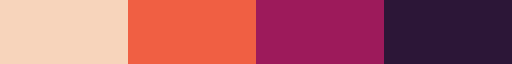

In [12]:
cmap = sns.color_palette("rocket_r", as_cmap=True)
cmaplist = [cmap(i) for i in range(15, cmap.N, 70)]
discrete_cmap = LinearSegmentedColormap.from_list('Custom rocket_r', cmaplist, len(cmaplist))
discrete_cmap

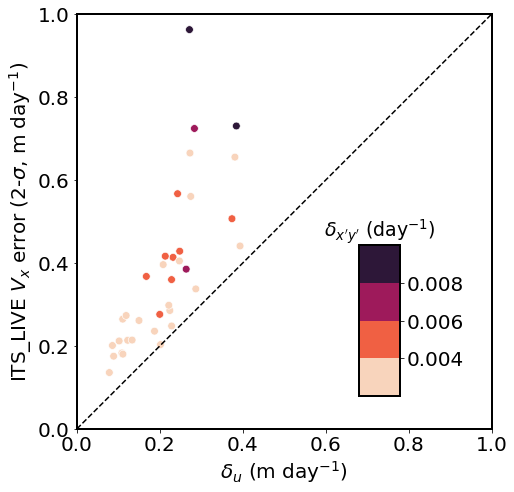

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), constrained_layout=True)
sns.scatterplot(data=df, x='SAV-uncertainty-x-m/day', y='Assigned-x-error-m/day-95CI', hue='LSR-uncertainty-sh-1/day', hue_norm=(0.002,0.01), palette=discrete_cmap, s=60, ax=ax, legend=False)
ax.plot([0, 1], [0, 1], '--', color='k')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('$\delta_u$ (m day$^{-1}$)')
ax.set_ylabel('ITS_LIVE $V_x$ error (2-$\sigma$, m day$^{-1}$)')


norm = mpl.colors.Normalize(vmin=0.002, vmax=0.01)
mappable = mpl.cm.ScalarMappable(norm=norm, cmap=discrete_cmap)

ax2 = fig.add_axes([0.7, 0.2, 0.08, 0.3])
fig.colorbar(mappable, cax=ax2, orientation='vertical', ticks=[0.004, 0.006, 0.008]) 

ax2.set_title("$\delta_{x'y'}$ (day$^{-1}$)", size=19)

## legend:
## < 0.004 lvl 1 
## 0.004 - 0.006 lvl 2
## 0.006 - 0.008 lvl 3
## > 0.008 lvl 4

# save figure
fig.patch.set_facecolor('xkcd:white')
fig.savefig('Fig7.png', dpi=200)